# StackOverflow

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import igraph as ig
import dionysus as d

In [12]:
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = 10, 6

## Data import

In [3]:
G = ig.read("data/stackoverflow/stackoverflow.graphml")

In [4]:
G.to_undirected(combine_edges="first")

In [5]:
G.summary()

'IGRAPH U--- 6024271 29637833 -- \n+ attr: id (v), id (e), time (e)'

## Normalize the time scale

In [6]:
time_min = min(G.es["time"])
time_max = max(G.es["time"])
time_min, time_max

(1217567877.0, 1457273428.0)

In [7]:
G.es["time"] = (np.array(G.es["time"]) - time_min) / (time_max - time_min)

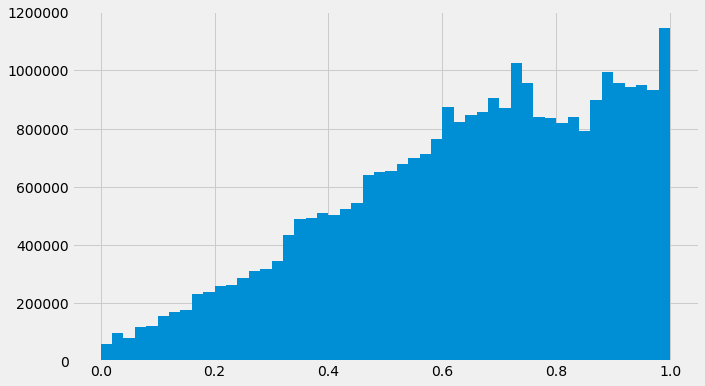

In [13]:
plt.hist(G.es["time"], bins=50);

## Discretize the time scale using non-overlapping windows

In [14]:
N = 16 # Number of windows

In [15]:
subgs = list(range(N))
for i in range(N):
    subgs[i] = G.subgraph_edges(G.es(lambda e: (e["time"] < (i+1)/N) & (e["time"] > i/N)))

In [27]:
for g in subgs:
    print(g.summary())

IGRAPH U--- 20980 250823 -- 
+ attr: id (v), id (e), time (e)
IGRAPH U--- 37230 422690 -- 
+ attr: id (v), id (e), time (e)
IGRAPH U--- 71040 613317 -- 
+ attr: id (v), id (e), time (e)
IGRAPH U--- 118686 820759 -- 
+ attr: id (v), id (e), time (e)
IGRAPH U--- 158286 1005142 -- 
+ attr: id (v), id (e), time (e)
IGRAPH U--- 230278 1406586 -- 
+ attr: id (v), id (e), time (e)
IGRAPH U--- 275189 1590592 -- 
+ attr: id (v), id (e), time (e)
IGRAPH U--- 337108 1906255 -- 
+ attr: id (v), id (e), time (e)
IGRAPH U--- 404867 2123235 -- 
+ attr: id (v), id (e), time (e)
IGRAPH U--- 495492 2476938 -- 
+ attr: id (v), id (e), time (e)
IGRAPH U--- 554112 2644770 -- 
+ attr: id (v), id (e), time (e)
IGRAPH U--- 634124 2971624 -- 
+ attr: id (v), id (e), time (e)
IGRAPH U--- 635831 2644386 -- 
+ attr: id (v), id (e), time (e)
IGRAPH U--- 678741 2620435 -- 
+ attr: id (v), id (e), time (e)
IGRAPH U--- 743367 2993869 -- 
+ attr: id (v), id (e), time (e)
IGRAPH U--- 772225 3146410 -- 
+ attr: id (v), 

## Weight rank clique filtration and persistent homology

In [19]:
from filtration import wrcf

In [20]:
def get_diagram(graph, weight="weight"):
    filt = wrcf(graph, weight=weight)
    pers = d.homology_persistence(filt)
    return(d.init_diagrams(pers, filt))

## Apply persistent homology to each window

In [25]:
from dask.distributed import Client

In [30]:
client = Client(processes=True)

In [31]:
dgms = client.map(get_diagram, subgs)

In [33]:
dgms

[<Future: status: error, key: get_diagram-65b68515fcf83a44ef86d6ff4583010f>,
 <Future: status: error, key: get_diagram-86065d597e80c26d3603e71c5e98d01c>,
 <Future: status: error, key: get_diagram-3906ca35b7ada6b02c5869f1cd3c6068>,
 <Future: status: error, key: get_diagram-9a07f5dccfdbd179f11bc1b07adf7107>,
 <Future: status: error, key: get_diagram-ab2984d23a128651aa82bc750de87b03>,
 <Future: status: error, key: get_diagram-796cd5c0d4d62fcdad4ba3a0dabe4dff>,
 <Future: status: error, key: get_diagram-07b0200bba935d2764a21320db1cd3d2>,
 <Future: status: error, key: get_diagram-578460a0109b40b9c746ce3e7a3e6312>,
 <Future: status: error, key: get_diagram-fbc78e6b6693380f3626f6fa03f36900>,
 <Future: status: error, key: get_diagram-6a2bd490796718c65bc6b2603e006ddf>,
 <Future: status: error, key: get_diagram-53530126c790f6df9a2962836ab6c943>,
 <Future: status: error, key: get_diagram-3b5e18a6bd05ba50f8b30e058f363894>,
 <Future: status: error, key: get_diagram-3c8e53753c8faf742c44ac339b3cd6d6>,

In [34]:
dgms = client.gather(dgms)
dgms

distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://129.67.184.177/10474/39 remote=inproc://129.67.184.177/10474/27>
distributed.comm.inproc - WARNING - Closing dangling queue in <InProc local=inproc://129.67.184.177/10474/40 remote=inproc://129.67.184.177/10474/27>


KeyError: 'Attribute does not exist'

Future exception was never retrieved
future: <Future finished exception=AllExit()>
Traceback (most recent call last):
  File "/home/lozeve/.local/share/virtualenvs/tda-networks--KypeAmE/lib/python3.5/site-packages/tornado/gen.py", line 1113, in run
    yielded = self.gen.send(value)
  File "/home/lozeve/.local/share/virtualenvs/tda-networks--KypeAmE/lib/python3.5/site-packages/distributed/client.py", line 1357, in wait
    raise AllExit()
distributed.client.AllExit
Future exception was never retrieved
future: <Future finished exception=AllExit()>
Traceback (most recent call last):
  File "/home/lozeve/.local/share/virtualenvs/tda-networks--KypeAmE/lib/python3.5/site-packages/tornado/gen.py", line 1113, in run
    yielded = self.gen.send(value)
  File "/home/lozeve/.local/share/virtualenvs/tda-networks--KypeAmE/lib/python3.5/site-packages/distributed/client.py", line 1357, in wait
    raise AllExit()
distributed.client.AllExit
Future exception was never retrieved
future: <Future finishe